In [6]:
from dataset import DataLoader, LabeledPathListingGenerator, DataSet
from matplotlib import pyplot as plt
# label_generator = LabelGenerator("dataset", ['avi'])
# data_loader = label_generator.gnerate_labels("video_label.pkl", "label_encoding.pkl")


data_loader = DataLoader("video_label.pkl", "label_encoding.pkl")
train_set, val_set, test_set = data_loader.generate_split([0.7,0.2,0.1])
# train_set.preprocess()
train_set.preprocess(frame_count=50, resize_width=224, resize_height=224)

generator = train_set.get_batch_generator(2)


Frame Shape (240, 320, 3)
Frame Shape (240, 320, 3)
Frame Shape (240, 320, 3)


In [ ]:
example = next(generator)
# example = generator
# train_set.width
print(example[0].shape)
print(example[0][0].shape)



(224, 224, 3)


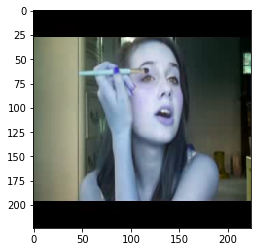

In [9]:
import numpy as np
print(example[0][0][0].shape)
# a = np.reshape(example[0][0][0], (224, 224))
# print(a.shape)
plt.imshow(example[0][0][0])

In [10]:
frame_count = 50
batch_size = 10
class_count = 2
from i3d_inception import Inception_Inflated3d
print(train_set.get_shape())
model = Inception_Inflated3d(classes=class_count, input_shape=(train_set.get_shape()))

model.summary()

(50, 224, 224, 3)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 50, 224, 224, 0                                            
__________________________________________________________________________________________________
Conv3d_1a_7x7_conv (Conv3D)     (None, 25, 112, 112, 65856       input_2[0][0]                    
__________________________________________________________________________________________________
Conv3d_1a_7x7_bn (BatchNormaliz (None, 25, 112, 112, 192         Conv3d_1a_7x7_conv[0][0]         
__________________________________________________________________________________________________
Conv3d_1a_7x7 (Activation)      (None, 25, 112, 112, 0           Conv3d_1a_7x7_bn[0][0]           
__________________________________________________________________________________________________
MaxPool2d_

In [18]:
hist = model.fit_generator(train_set.get_batch_generator(batch_size,frame_count),
                       validation_data=val_set.get_batch_generator(batch_size,frame_count),
                       epochs=10,
                              steps_per_epoch=train_set.size/batch_size,
                              validation_steps=val_set.size/batch_size)

Epoch 1/10


In [ ]:
model.eval


